**Due: Sunday at 11:59 P.M. via Collab and GitHub**

Learning Objective
1.	Put into practice using Python to interact and call a public API successfully
2.	Look at the data within JSON and DataFrames
3.	Write your data to a local file (JSON)
4.	Use basic visualization to display information
5.	Interact with users

Challenge:
You have seen some examples of how to interact with JSON, CSV and make API Calls. Take some time to explore the YAHOO Finance Guide https://syncwith.com/yahoo-finance/yahoo-finance-api which shows you endpoints for calling information. Your job is to code a Python Program that does the following things:

1.	Takes user input for a stock (using the Ticker Symbol): IE with the input() command
2.	You will display back the user: Name Ticker, Full Name of the Stock, Current Price, Target Mean Price, Cash on Hand, Profit Margins
3.	Store the Results Locally in JSON Format with just those items and include a date of when that data was pulled
4.	Handle Errors (IE, the stock doesn’t exist and/or the API is not returning information)

You will have to read the documentation and figure out which modules to call to get the data that you need. You will need to make more than one call to this API. Use the examples in our Zoom Session to guide you, but the documentation will be enough. Post your code to GitHub.

Bonus –
1.	Use MatPlotLib to chart the historical price of a stock price’s highest value over the past 5 days. 



In [89]:
#Omisha Mondal Computing ID: om4kud
import json
import requests
import pandas as pd
import matplotlib
import yfinance as yf

In [90]:
stock = input() #this asks the user for a stock/ticker or something 
stock

MSFT


'MSFT'

In [91]:
print(stock)

MSFT


In [92]:
#step 1 set up url where is this enpoint that I want
#base url https://query1.finance.yahoo.com/v7/finance/quote
urlQuote = 'https://query1.finance.yahoo.com/v7/finance/quote'
querystring = {"symbols": stock}
print(querystring)

{'symbols': 'MSFT'}


In [93]:
header_var ={
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.request("GET",urlQuote, headers=header_var,params=querystring)


In [94]:
stock_json = response.json()


In [95]:
stock_json['quoteResponse']['result'][0]['longName']

'Microsoft Corporation'

In [96]:
urlSummary="https://query1.finance.yahoo.com/v10/finance/quoteSummary/"
query_str_2 = {"symbol": stock, "modules":"financialData"}

response_2 = requests.request("GET", urlSummary, headers=header_var,params=query_str_2)

stock_json_2 = response_2.json()

stock_json_2


{'quoteSummary': {'result': [{'financialData': {'maxAge': 86400,
     'currentPrice': {'raw': 247.0769, 'fmt': '247.08'},
     'targetHighPrice': {'raw': 411.0, 'fmt': '411.00'},
     'targetLowPrice': {'raw': 275.0, 'fmt': '275.00'},
     'targetMeanPrice': {'raw': 323.15, 'fmt': '323.15'},
     'targetMedianPrice': {'raw': 315.0, 'fmt': '315.00'},
     'recommendationMean': {'raw': 1.7, 'fmt': '1.70'},
     'recommendationKey': 'buy',
     'numberOfAnalystOpinions': {'raw': 44, 'fmt': '44', 'longFmt': '44'},
     'totalCash': {'raw': 104748998656,
      'fmt': '104.75B',
      'longFmt': '104,748,998,656'},
     'totalCashPerShare': {'raw': 14.045, 'fmt': '14.05'},
     'ebitda': {'raw': 97982996480,
      'fmt': '97.98B',
      'longFmt': '97,982,996,480'},
     'totalDebt': {'raw': 78399995904,
      'fmt': '78.4B',
      'longFmt': '78,399,995,904'},
     'quickRatio': {'raw': 1.567, 'fmt': '1.57'},
     'currentRatio': {'raw': 1.785, 'fmt': '1.78'},
     'totalRevenue': {'raw': 1

In [97]:
#Handle errors
if len(stock_json['quoteResponse']['result']) == 0:
    print("This stock does not exist.")

In [98]:
print("Name Ticker:", stock)
print("Full Name of the Stock:", stock_json['quoteResponse']['result'][0]['longName'])
print("Current Price:", stock_json_2['quoteSummary']['result'][0]['financialData']['currentPrice']['raw'])
print("Target Mean Price:", stock_json_2['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw'])
print("Cash on Hand:", stock_json_2['quoteSummary']['result'][0]['financialData']['totalCash']['raw'])
print("Profit Margins:", stock_json_2['quoteSummary']['result'][0]['financialData']['profitMargins']['raw'])

Name Ticker: MSFT
Full Name of the Stock: Microsoft Corporation
Current Price: 247.0769
Target Mean Price: 323.15
Cash on Hand: 104748998656
Profit Margins: 0.36686


In [99]:
#Write to json file
from datetime import datetime

today = datetime.today().strftime('%Y-%m-%d')

data = {"Name Ticker" : stock, 
        "Full Name of the Stock" : stock_json['quoteResponse']['result'][0]['longName'],
        "Current Price" : stock_json_2['quoteSummary']['result'][0]['financialData']['currentPrice']['raw'],
        "Target Mean Price" : stock_json_2['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw'],
        "Cash on Hand" : stock_json_2['quoteSummary']['result'][0]['financialData']['totalCash']['raw'],
        "Profit Margins" : stock_json_2['quoteSummary']['result'][0]['financialData']['profitMargins']['raw'],
        "Today" : today}

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

<AxesSubplot:title={'center':"Historical Price of MSFT's Highest Value Over the Past 5 Days"}, xlabel='Date'>

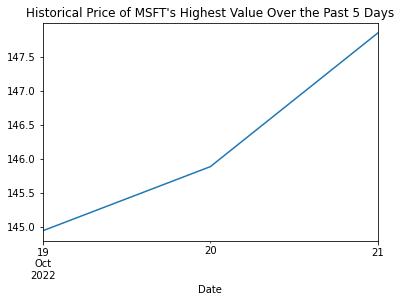

In [100]:
#Bonus plot
from yahoofinancials import YahooFinancials
import datetime

start = (datetime.datetime.now() - datetime.timedelta(days = 5)).date()
end = datetime.datetime.now().date()

time = yf.download(stock,
                        start = start,
                        end = end,
                        progress = False
                        )

time_data['High'].plot(title = f"Historical Price of {stock}\'s Highest Value Over the Past 5 Days")